In [3]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# COLLECTING THE DATA

In [4]:
train = pd.read_csv('train.csv')
assign = pd.read_csv('test.csv')

# CHOOSING MEASURE OF SUCCESS 
SINCE THE GIVEN DATA IS AN EXAMPLE OF CLASSIFICATION PROBLEM, Hence we will use RECALL , PRECISION and ACCURACY

In [5]:
def success(y_train , y_pred):
    cm_tr  = confusion_matrix(y_train, y_pred).ravel()

    precision_tr = cm_tr[3]/(cm_tr[3]+cm_tr[1])
    recall_tr = cm_tr[3]/(cm_tr[3]+cm_tr[2])

    '''print('PRECISION : ' , precision_tr)
    print('RECALL    : ' , recall_tr)
    print('ACCURACY : ' , accuracy_score(y_train, y_pred))
    K = 2*(precision_tr * recall_tr)/(precision_tr+ recall_tr)
    print('F2 SCORE :' , K)'''
    return accuracy_score(y_train, y_pred)

# PREPARING THE DATA 

### HANDLING MISSING VALUE 

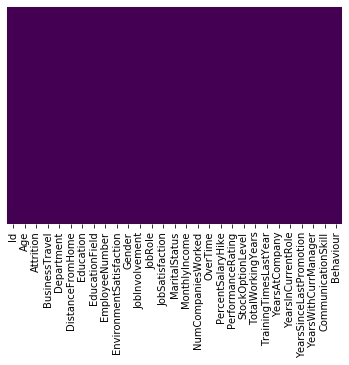

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#THERE ARE NO MISSING VALUES IN THE DATA

# Checking for skewed data

In [7]:
from scipy import stats

In [8]:
age_boxcox = stats.boxcox(train['Age'])[0]
train['Age'] = pd.Series(age_boxcox)

dist_boxcox = stats.boxcox(train['DistanceFromHome'])[0]
train['DistanceFromHome'] = pd.Series(dist_boxcox)

mi_boxcox = stats.boxcox(train['MonthlyIncome']+2)[0]
train['MonthlyIncome'] = pd.Series(mi_boxcox)

psh_boxcox = stats.boxcox(train['PercentSalaryHike'])[0]
train['PercentSalaryHike'] = pd.Series(psh_boxcox)

twy_boxcox = stats.boxcox(train['TotalWorkingYears']+5)[0]
train['TotalWorkingYears'] = pd.Series(twy_boxcox)

yac_boxcox = stats.boxcox(train['YearsAtCompany']+1)[0]
train['YearsAtCompany'] = pd.Series(yac_boxcox)

yr_boxcox = stats.boxcox(train['YearsInCurrentRole']+1.5)[0]
train['YearsInCurrentRole'] = pd.Series(yr_boxcox)

lp_boxcox = stats.boxcox(train['YearsSinceLastPromotion']+0.1)[0]
train['YearsSinceLastPromotion'] = pd.Series(lp_boxcox)

cm_boxcox = stats.boxcox(train['YearsWithCurrManager']+1)[0]
train['YearsWithCurrManager'] = pd.Series(cm_boxcox)

In [9]:
m_boxcox = (stats.boxcox(assign['YearsWithCurrManager']+1)[0])
assign['YearsWithCurrManager'] = pd.Series(m_boxcox)

lp_boxcox = stats.boxcox(assign['YearsSinceLastPromotion']+0.01)[0]
assign['YearsSinceLastPromotion'] = pd.Series(lp_boxcox)

yr_boxcox = stats.boxcox(assign['YearsInCurrentRole']+1.5)[0]
assign['YearsInCurrentRole'] = pd.Series(yr_boxcox)

yac_boxcox = stats.boxcox(assign['YearsAtCompany']+1)[0]
assign['YearsAtCompany'] = pd.Series(yac_boxcox)

twy_boxcox = stats.boxcox(assign['TotalWorkingYears']+5)[0]
assign['TotalWorkingYears'] = pd.Series(twy_boxcox)

psh_boxcox = stats.boxcox(assign['PercentSalaryHike'])[0]
assign['PercentSalaryHike'] = pd.Series(psh_boxcox)

mi_boxcox = stats.boxcox(assign['MonthlyIncome']+2)[0]
assign['MonthlyIncome'] = pd.Series(mi_boxcox)

dist_boxcox = stats.boxcox(assign['DistanceFromHome'])[0]
assign['DistanceFromHome'] = pd.Series(dist_boxcox)

age_boxcox = stats.boxcox(assign['Age'])[0]
assign['Age'] = pd.Series(age_boxcox)

# Setting an Evaluation Protocol 
### 1.Maintaining a Hold Out Validation Set

In [10]:
X_train,X_test ,y_train,y_test =  train_test_split(train.drop(['Attrition' , 'Id'] , axis = 1) , train['Attrition'],test_size=0.1)
X_assign = assign.drop(['Id'] , axis = 1)

### Handling Caterogical Data

In [11]:
X_train = pd.get_dummies(X_train , columns = ['OverTime','JobRole','BusinessTravel','Department','EducationField','Gender','MaritalStatus' ] , drop_first = True)
X_test = pd.get_dummies(X_test , columns = ['OverTime','JobRole','BusinessTravel','Department','EducationField','Gender','MaritalStatus' ] , drop_first = True)
X_assign = pd.get_dummies(X_assign , columns = ['OverTime','JobRole','BusinessTravel','Department','EducationField','Gender','MaritalStatus' ] , drop_first = True)

# FEATURE SCALLING  

In [12]:
from sklearn import preprocessing
X_train_initial = pd.DataFrame(preprocessing.scale(X_train) , columns = X_train.columns)
X_test_scaled =pd.DataFrame(preprocessing.scale(X_test) , columns = X_test.columns)
X_assign_scaled = pd.DataFrame(preprocessing.scale(X_assign) , columns = X_assign.columns)

# FEATURE SELECTION 

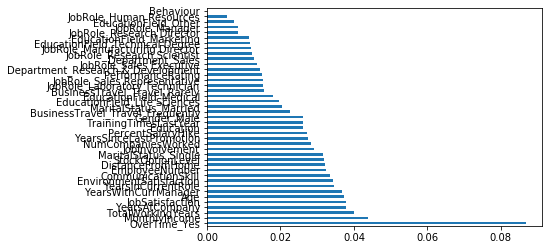

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train_initial, y_train)
feat_importances = pd.Series(model.feature_importances_ , index= X_train_initial.columns)
feat_importances.nlargest(41).plot(kind='barh')
plt.show()

In [14]:
X_train_pca = X_train_initial.drop(['Behaviour'],axis=1).copy()
X_test_scaled = X_test_scaled.drop(['Behaviour'],axis=1)
X_assign_scaled = X_assign_scaled.drop(['Behaviour'],axis=1)

### 6.2 Cross Validation (K-fold)

In [15]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=50, shuffle=True, random_state=0)

# LOGISTIC REGRESSION

In [16]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [18]:
scoring = 'accuracy'
score = cross_val_score(LR,X_train_pca,y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.86666667 0.8        0.56666667 0.73333333 0.8        0.8
 0.8        0.86666667 0.76666667 0.83333333 0.73333333 0.76666667
 0.7        0.8        0.8        0.82758621 0.79310345 0.72413793
 0.75862069 0.79310345 0.68965517 0.96551724 0.86206897 0.79310345
 0.62068966 0.93103448 0.82758621 0.82758621 0.79310345 0.79310345
 0.79310345 0.89655172 0.72413793 0.75862069 0.79310345 0.82758621
 0.72413793 0.72413793 0.86206897 0.5862069  0.72413793 0.82758621
 0.72413793 0.72413793 0.68965517 0.86206897 0.68965517 0.75862069
 0.75862069 0.79310345]


77.75

In [19]:
LR.fit(X_train_pca, y_train)
train_pred = LR.predict(X_train_pca)
success(y_train , train_pred)


0.7904436860068259

# SVM CLASSIFIER

In [20]:
from sklearn.svm import SVC
SVC = SVC()
SVC.fit(X_train_pca , y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
scoring = 'accuracy'
score = cross_val_score(SVC ,X_train_pca,y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.96666667 0.96666667 0.76666667 0.9        0.96666667 1.
 0.93333333 0.93333333 0.9        0.96666667 0.96666667 0.9
 0.86666667 0.9        0.9        1.         0.82758621 0.96551724
 0.93103448 0.86206897 0.93103448 1.         0.93103448 0.93103448
 0.93103448 1.         0.93103448 0.96551724 0.96551724 0.89655172
 0.89655172 1.         0.89655172 0.93103448 0.96551724 0.89655172
 0.86206897 0.79310345 0.96551724 0.82758621 0.89655172 0.89655172
 1.         0.93103448 0.89655172 1.         0.86206897 1.
 0.96551724 0.93103448]


92.63

In [22]:
SVC.fit(X_train_pca, y_train)
train_pred = SVC.predict(X_train_pca)
success(y_train , train_pred)


0.967235494880546

# DECISION TREE CLASSIFIER

In [23]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(DTC ,X_train_pca,y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)
DTC.fit(X_train_pca, y_train)
train_pred = DTC.predict(X_train_pca)
success(y_train , train_pred)

In [24]:
scoring = 'accuracy'
score = cross_val_score(DTC ,X_train_pca,y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)


[0.93333333 0.9        0.9        0.96666667 1.         0.96666667
 0.93333333 0.83333333 0.93333333 1.         0.93333333 0.9
 0.9        0.9        0.96666667 0.96551724 0.89655172 0.96551724
 0.96551724 0.93103448 0.89655172 1.         0.89655172 0.96551724
 0.86206897 0.93103448 0.93103448 0.93103448 0.93103448 0.96551724
 0.96551724 0.93103448 1.         0.96551724 0.96551724 0.89655172
 0.96551724 0.82758621 0.96551724 0.89655172 0.93103448 0.96551724
 0.96551724 0.96551724 0.93103448 0.93103448 0.89655172 0.93103448
 0.93103448 0.96551724]


93.59

In [25]:
DTC.fit(X_train_pca, y_train)
train_pred = DTC.predict(X_train_pca)
success(y_train , train_pred)


1.0

# RANDOM FOREST CLASSIFIER 

In [26]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 200 , max_depth = 175 , min_samples_split = 4)

In [27]:
scoring = 'accuracy'
score = cross_val_score(RFC ,X_train_pca,y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.96666667 0.96666667 1.         0.96666667 1.         0.96666667
 1.         0.93333333 1.         1.         1.         0.93333333
 0.96666667 1.         0.96666667 1.         0.96551724 1.
 0.96551724 0.96551724 0.96551724 1.         0.96551724 0.96551724
 1.         0.96551724 1.         0.96551724 1.         1.
 0.96551724 1.         1.         0.96551724 0.96551724 0.93103448
 1.         1.         0.96551724 0.96551724 0.96551724 0.96551724
 1.         1.         1.         1.         0.96551724 1.
 1.         1.        ]


98.09

In [28]:
RFC.fit(X_train_pca, y_train)
train_pred = RFC.predict(X_train_pca)
success(y_train , train_pred)


1.0

# NEURAL NETWORK

In [29]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(max_iter = 1000)

In [30]:
scoring = 'accuracy'
score = cross_val_score(MLP ,X_train_pca,y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.96666667 1.         0.9        0.96666667 0.96666667 0.96666667
 0.9        0.96666667 0.93333333 0.96666667 1.         0.86666667
 0.86666667 1.         0.93333333 1.         0.86206897 1.
 0.96551724 0.93103448 0.96551724 1.         0.93103448 0.93103448
 0.93103448 1.         0.96551724 0.93103448 0.96551724 0.96551724
 1.         1.         0.93103448 0.89655172 0.96551724 0.93103448
 0.96551724 0.96551724 0.96551724 0.89655172 0.93103448 0.96551724
 1.         0.96551724 0.96551724 1.         0.93103448 0.96551724
 0.96551724 0.93103448]


95.37

In [31]:
MLP.fit(X_train_pca, y_train)
train_pred = MLP.predict(X_train_pca)
success(y_train , train_pred)

1.0

# Stochastic Gradient Descent

In [32]:
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier()

In [33]:
scoring = 'accuracy'
score = cross_val_score(SGD ,X_train_pca,y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.66666667 0.83333333 0.66666667 0.7        0.8        0.7
 0.7        0.76666667 0.7        0.86666667 0.7        0.73333333
 0.6        0.8        0.73333333 0.75862069 0.72413793 0.79310345
 0.75862069 0.68965517 0.65517241 0.93103448 0.75862069 0.79310345
 0.55172414 0.86206897 0.75862069 0.68965517 0.75862069 0.79310345
 0.75862069 0.72413793 0.68965517 0.72413793 0.86206897 0.65517241
 0.75862069 0.72413793 0.86206897 0.65517241 0.75862069 0.79310345
 0.75862069 0.75862069 0.72413793 0.82758621 0.72413793 0.68965517
 0.62068966 0.68965517]


74.0

In [34]:
SGD.fit(X_train_pca, y_train)
train_pred = SGD.predict(X_train_pca)
success(y_train , train_pred)

0.7460750853242321

# SAVING PREDICTIONS INTO CSV FILE 


In [886]:
X_assign.shape

(470, 41)

In [887]:
X_assign_scaled.shape

(470, 39)

In [50]:
SVC.fit(X_train_pca, y_train)
prediction = SVC.predict(X_assign_scaled)
test_prediction = SVC.predict(X_test_scaled)

In [51]:
submission = pd.DataFrame({
        "Id": assign["Id"],
        "Attrition": prediction
    })

submission.to_csv('LR_submission.csv', index=False)

In [52]:
print('Test Accuracy: {:.2f} %'.format(np.mean(test_prediction == y_test) * 100))

Test Accuracy: 92.02 %


In [53]:
#submission = pd.read_csv('SVC_submission.csv')
print('Test Accuracy: {:.2f} %'.format(np.mean(prediction == submission['Attrition']) * 100))

Test Accuracy: 100.00 %


0      0
1      0
2      1
3      0
4      0
      ..
465    1
466    1
467    1
468    0
469    0
Name: Attrition, Length: 470, dtype: int64